In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
df = pd.read_csv("./titanic/train.csv", header=0, index_col="PassengerId")
df.shape

(891, 11)

In [80]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [82]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


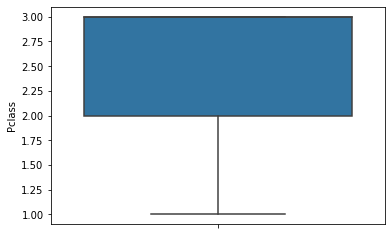

In [83]:
sns.boxplot(y = "Pclass", data=df)

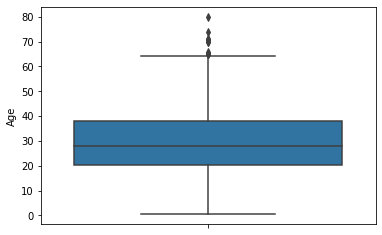

In [84]:
sns.boxplot(y = "Age", data=df)

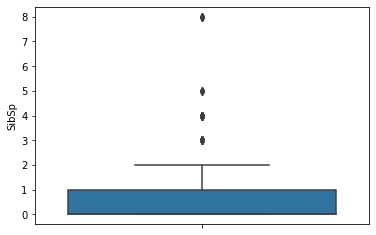

In [85]:
sns.boxplot(y = "SibSp", data=df)

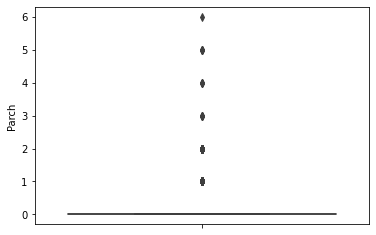

In [86]:
sns.boxplot(y = "Parch", data=df)

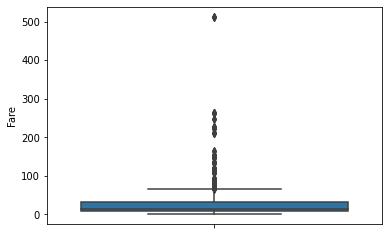

In [87]:
sns.boxplot(y = "Fare", data=df)

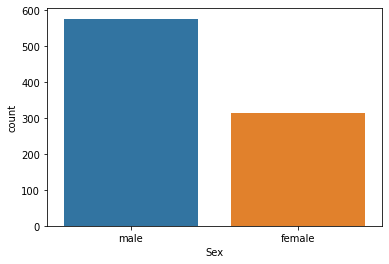

In [88]:
sns.countplot(x="Sex", data=df)

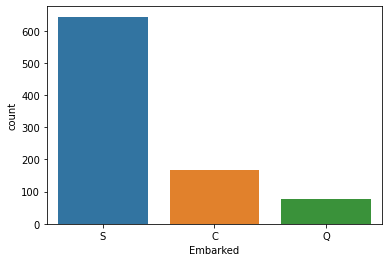

In [89]:
sns.countplot(x="Embarked", data=df)

# Observations

## missing values
* Age
* Cabin

## Outliers
* SibSp
* Age
* Fare

In [90]:
uv = np.percentile(df.SibSp, [99])[0]

df[df.SibSp > uv]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [91]:
df.SibSp[df.SibSp > 3*uv] = 3*uv

/home/orashar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/orashar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
df.Age = df.Age.fillna(df.Age.mean())

del df["Cabin"]
del df["Name"]

In [94]:
df = pd.get_dummies(df)

In [95]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
del df["Embarked_S"]
del df["Ticket_WE/P 5735"]
del df["Sex_female"]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Columns: 689 entries, Survived to Embarked_Q
dtypes: float64(2), int64(4), uint8(683)
memory usage: 683.0 KB


In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression()

In [100]:
X = df.values[:, 1:]
y = df.values[:, 0]
print(X.shape, y.shape)

(891, 688) (891,)


In [101]:
lr.fit(X, y)

/home/orashar/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [102]:
lr.coef_

array([[-1.38109195e+00, -5.07693251e-02, -3.75388469e-01,
        -2.09932292e-02,  2.86877687e-04, -3.01684912e+00,
         1.89933080e-01,  3.31593213e-02, -3.19893279e-01,
         3.47737372e-01,  8.41578603e-02, -1.11943071e-01,
        -1.36162958e-01,  1.27255126e-01,  2.84526490e-01,
         3.03560791e-01,  3.50980667e-01,  3.80495937e-01,
        -1.19658410e-01, -1.37057762e-01,  1.07005675e-01,
        -1.37057762e-01, -1.17871704e-01,  3.07959679e-01,
        -2.29333407e-01, -1.57478728e-01, -1.29910273e-01,
        -1.29118369e-01, -2.15654689e-01,  3.91323096e-01,
        -1.57010123e-01, -1.79738023e-01, -1.61835204e-01,
        -3.97725938e-01,  1.80293490e-01, -1.82149636e-01,
        -1.64921391e-01, -1.05027217e-01,  1.70436514e-01,
         6.68255624e-01, -1.79236060e-01, -1.74891364e-01,
        -7.52058596e-02, -6.75737948e-01,  1.39357576e-01,
        -1.36818313e-01,  3.89673775e-01, -1.17065628e-01,
         3.39627659e-01, -1.62746631e-02, -1.12438724e-0

In [103]:
lr.intercept_

array([6.06339194])

In [104]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [105]:
y_pred = lr.predict(X)

In [106]:
accuracy_score(y, y_pred)

0.8417508417508418

In [122]:
dft = pd.read_csv("./titanic/test.csv")
dft.shape

(418, 11)

In [123]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
Xt = dft.values
print(Xt.shape)

(418, 11)


In [125]:
uv = np.percentile(dft.SibSp, [99])[0]

df.SibSp[df.SibSp > 3*uv] = 3*uv

/home/orashar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
uv = np.percentile(dft.Fare, [99])[0]

dft.Fare[dft.Fare > 3*uv] = 3*uv

/home/orashar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
dft.Age = dft.Age.fillna(dft.Age.mean())

del dft["Cabin"]
del dft["Name"]

In [128]:
dft = pd.get_dummies(dft)

In [129]:
dft.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110469,Ticket_110489,...,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
del dft["Embarked_S"]
del dft["Ticket_WE/P 5735"]
del dft["Sex_female"]

KeyError: 'Ticket_WE/P 5735'

In [133]:
Xt = dft
Xt.shape

(418, 373)

In [134]:
yt_pred = lr.predict(Xt)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').